In [6]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
data = r'G:\bl.csv'
df = pd.read_csv(data)
df.rename(columns={'whether he/she donated blood in March 2007': 'Class','x.1': 'top-middle-square','x.2': 'top-right-square','x.3': 'middle-left-square','o': 'middle-middle-square','o.1': 'middle-right-square','x.4': 'bottom-left-square','o.2': 'bottom-middle-square','o.3': 'bottom-right-square','positive': 'Class', }, inplace=True)
print(df)
X = df.drop('Class', axis=1)  
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
5                   4                  4                   1000   
6                   2                  7                   1750   
7                   1                 12                   3000   
8                   2                  9                   2250   
9                   5                 46                  11500   
10                  4                 23                   5750   
11                  0                  3                    750   
12                  2                 10                   2500   
13                  1                 13                   325

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=100) 
#classifier = DecisionTreeClassifier()  
dt.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
ft = ['Recency (months)', 'Frequency (times)','Monetary (c.c. blood)','Time (months)']

True

C:\Users\olip\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


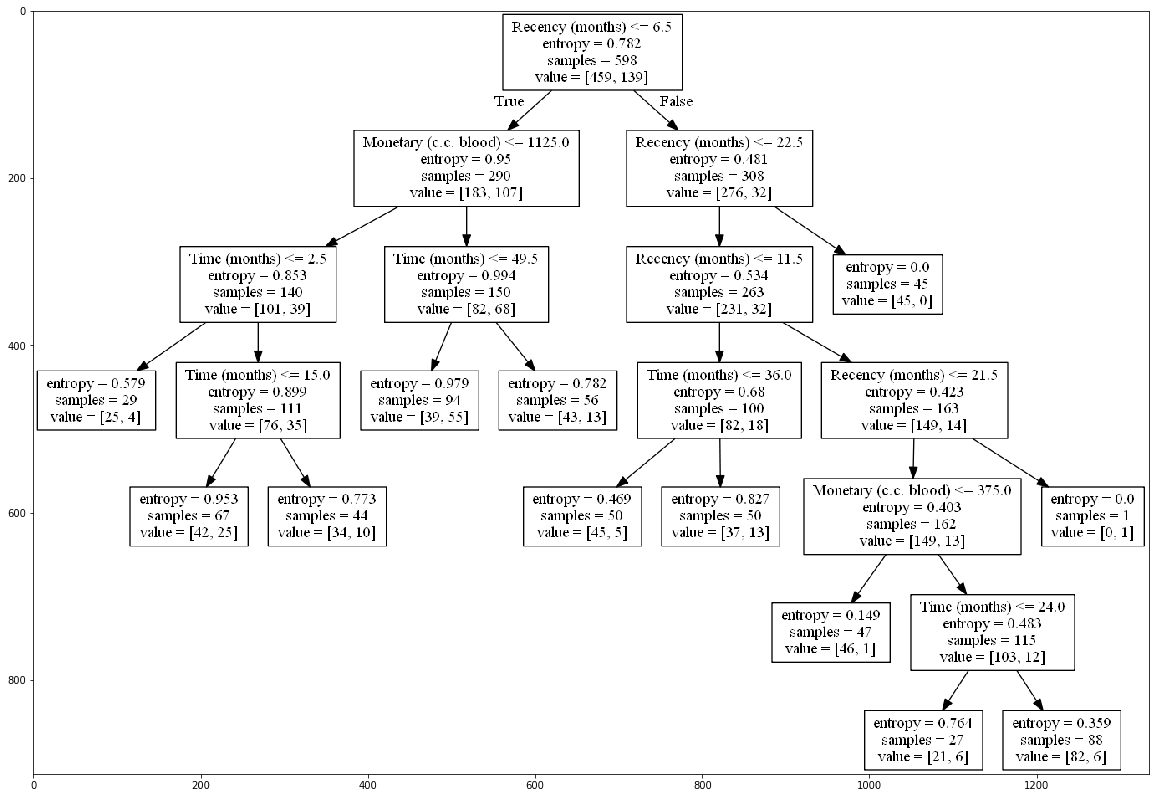

In [25]:
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import tree

import graphviz
import pydotplus
import io
from scipy import misc

def show_tree(tre, feature, path):
    f= io.StringIO()
    tree.export_graphviz(tre, out_file=f, feature_names=ft)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png (path)
    img = misc.imread (path) 
    plt.rcParams ["figure.figsize"] = (20, 20) 
    plt.imshow(img)
    
show_tree(dt, X_train, 'dec_tree_01.png')
    


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt.predict(X_test) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[103   8]
 [ 22  17]]
             precision    recall  f1-score   support

          0       0.82      0.93      0.87       111
          1       0.68      0.44      0.53        39

avg / total       0.79      0.80      0.78       150



In [33]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt.predict(X_test) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 


[[103   8]
 [ 22  17]]
             precision    recall  f1-score   support

          0       0.82      0.93      0.87       111
          1       0.68      0.44      0.53        39

avg / total       0.79      0.80      0.78       150



In [29]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy: " , round(score,1), "%")

Accuracy:  80.0 %
